#Montado de Google Drive y librerías

In [ ]:
from google.colab import drive # Conexion con google drive
drive.mount('/content/drive') # Manejo del directorio de drive

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob

In [ ]:
import pickle
from pickle import dump, load
import os
import numpy as np
from os import walk
import math

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import toktok
import re
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import cess_esp
nltk.download('cess_esp')
nltk.download('punkt')
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#for model-building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Juntar todos los datasets en uno solo

In [ ]:
path = '/content/drive/MyDrive/Taller-Datasets/texto/reviews-etiquetados/'

In [ ]:
df_taller = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
df_taller

,annotation_id,annotator,created_at,id,lead_time,sentiment,text,updated_at,undefined$
0,5.0,1.0,2023-07-15T23:08:12.265424Z,1.0,16.307,Positive,La serie cuenta la historia de un joven superm...,2023-07-15T23:08:12.265424Z,NaN
1,6.0,1.0,2023-07-15T23:08:21.629566Z,2.0,4.901,Positive,Una ratita maravillosa nos enseña el poder de ...,2023-07-15T23:08:21.629566Z,NaN
0,7.0,1.0,2023-07-15T23:09:19.751783Z,1.0,2.145,Positive,"la vida de Chuty es realmente interesante, dej...",2023-07-15T23:09:19.751783Z,NaN
0,1.0,1.0,2023-07-17T19:58:06.662879Z,1.0,40.193,Positivo,Quizá con mayor estilo que en el pasado. Le ha...,2023-07-17T19:58:06.662879Z,NaN
1,5.0,1.0,2023-07-17T20:00:53.681232Z,2.0,15.644,Negativo,Con un guion algo más embrollado de lo habitua...,2023-07-17T20:00:53.681232Z,NaN
...,...,...,...,...,...,...,...,...,...
5,3.0,1.0,2023-07-17T19:58:11.071906Z,3.0,4.471,Positivo,10 cosas que odio de ti: Es una pelicula bonita,2023-07-17T19:58:11.071906Z,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,1.0,2023-07-17T19:58:16.802917Z,4.0,3.421,Negativo,10 cosas que odio de ti: Es una pelicula muy a...,2023-07-17T19:58:16.802917Z,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_taller = df_taller.dropna(subset=['text', 'sentiment'])
df_taller

,annotation_id,annotator,created_at,id,lead_time,sentiment,text,updated_at,undefined$
0,5.0,1.0,2023-07-15T23:08:12.265424Z,1.0,16.307,Positive,La serie cuenta la historia de un joven superm...,2023-07-15T23:08:12.265424Z,NaN
1,6.0,1.0,2023-07-15T23:08:21.629566Z,2.0,4.901,Positive,Una ratita maravillosa nos enseña el poder de ...,2023-07-15T23:08:21.629566Z,NaN
0,7.0,1.0,2023-07-15T23:09:19.751783Z,1.0,2.145,Positive,"la vida de Chuty es realmente interesante, dej...",2023-07-15T23:09:19.751783Z,NaN
0,1.0,1.0,2023-07-17T19:58:06.662879Z,1.0,40.193,Positivo,Quizá con mayor estilo que en el pasado. Le ha...,2023-07-17T19:58:06.662879Z,NaN
1,5.0,1.0,2023-07-17T20:00:53.681232Z,2.0,15.644,Negativo,Con un guion algo más embrollado de lo habitua...,2023-07-17T20:00:53.681232Z,NaN
...,...,...,...,...,...,...,...,...,...
1,1.0,1.0,2023-07-17T19:57:55.253556Z,1.0,531.578,Positivo,10 cosas que odio de ti: Es uan pelicula diver...,2023-07-17T20:06:19.401702Z,NaN
3,2.0,1.0,2023-07-17T19:58:03.518065Z,2.0,5.070,Positivo,10 cosas que odio de ti: Es una pelicula romàn...,2023-07-17T19:58:03.518065Z,NaN
5,3.0,1.0,2023-07-17T19:58:11.071906Z,3.0,4.471,Positivo,10 cosas que odio de ti: Es una pelicula bonita,2023-07-17T19:58:11.071906Z,NaN
7,4.0,1.0,2023-07-17T19:58:16.802917Z,4.0,3.421,Negativo,10 cosas que odio de ti: Es una pelicula muy a...,2023-07-17T19:58:16.802917Z,NaN


In [ ]:
df_taller = df_taller.drop(columns=['annotation_id', 'annotator', 'created_at', 'id', 'lead_time', 'updated_at', 'undefined$'])
df_taller

,sentiment,text
0,Positive,La serie cuenta la historia de un joven superm...
1,Positive,Una ratita maravillosa nos enseña el poder de ...
0,Positive,"la vida de Chuty es realmente interesante, dej..."
0,Positivo,Quizá con mayor estilo que en el pasado. Le ha...
1,Negativo,Con un guion algo más embrollado de lo habitua...
...,...,...
1,Positivo,10 cosas que odio de ti: Es uan pelicula diver...
3,Positivo,10 cosas que odio de ti: Es una pelicula romàn...
5,Positivo,10 cosas que odio de ti: Es una pelicula bonita
7,Negativo,10 cosas que odio de ti: Es una pelicula muy a...


In [ ]:
df_taller.rename(columns = {'sentiment':'sentimiento', 'text':'texto'}, inplace = True)

##Añadir datos recolectados previamentes

In [ ]:
df_previo = pd.read_csv('/content/drive/MyDrive/Taller-Datasets/texto/previoDataset.csv')
df = pd.concat([df_previo, df_taller])
df

,texto,sentimiento
0,"""May, Quieres ser mi amigo?"" es una de esas pe...",positiva
1,Es todo un alivio que ante tanta pelcula que t...,positiva
2,"Una fiesta llena de excesos, rubias despampana...",negativa
3,"Zoom nos cuenta la historia de Jack Shepard, a...",negativa
4,Luc Besson dirige esta pelcula basada en sus p...,positiva
...,...,...
1,10 cosas que odio de ti: Es uan pelicula diver...,Positivo
3,10 cosas que odio de ti: Es una pelicula romàn...,Positivo
5,10 cosas que odio de ti: Es una pelicula bonita,Positivo
7,10 cosas que odio de ti: Es una pelicula muy a...,Negativo


#Clasificación

## Pre-procesamiento

In [ ]:
x = df['texto'].tolist()
y = df['sentimiento'].tolist()
print(len(x))
print(len(y))


4008
4008


Remoción de palabras no deseadas, lematización y limpiado de carácteres

In [ ]:
class TextPreprocessing:
    def __init__(self, pathOfObjectDirectory='/content/drive/MyDrive/Taller-Datasets/texto/utils/'):
        if os.path.isfile(pathOfObjectDirectory+'tagger.pkl'):
            with open(pathOfObjectDirectory+'tagger.pkl', 'rb') as inp:
                self.tagger = pickle.load(inp)
        else:
            tagger = self.unigramTagger()
            with open(pathOfObjectDirectory+'tagger.pkl', 'wb') as outp:
                pickle.dump(tagger, outp, pickle.HIGHEST_PROTOCOL)
            self.tagger = tagger

        if os.path.isfile(pathOfObjectDirectory+'lemmatizer_pos.pkl'):
            with open(pathOfObjectDirectory+'lemmatizer_pos.pkl', 'rb') as inp:
                self.lemmatizer_pos = pickle.load(inp)
        else:
            lemmatizer_pos = self.makeLemmatizerPos(pathOfObjectDirectory+'generate.txt')
            with open(pathOfObjectDirectory+'lemmatizer_pos.pkl', 'wb') as outp:
                pickle.dump(lemmatizer_pos, outp, pickle.HIGHEST_PROTOCOL)
            self.lemmatizer_pos = lemmatizer_pos

        if os.path.isfile(pathOfObjectDirectory+'lemmatizer.pkl'):
            with open(pathOfObjectDirectory+'lemmatizer.pkl', 'rb') as inp:
                self.lemmatizer = pickle.load(inp)
        else:
            lemmatizer = self.makeLemmatizer(pathOfObjectDirectory+'generate.txt')
            with open(pathOfObjectDirectory+'lemmatizer.pkl', 'wb') as outp:
                pickle.dump(lemmatizer, outp, pickle.HIGHEST_PROTOCOL)
            self.lemmatizer = lemmatizer

        f=open(pathOfObjectDirectory + 'stopwords_spanish.txt', encoding='utf-8')
        words=f.read()
        self.stopwords=words.split()
        f.close()

        # if os.path.isfile(pathOfObjectDirectory+'lemmatizer_pos.pkl'):
        #     self.lemmatizer_pos = open(pathOfObjectDirectory+'lemmatizer_pos.pkl', 'rb')
        # else:
        #     lemmatizer_pos = self.makeLemmatizerPos('/content/drive/MyDrive/NLP/generate.txt')
        #     output=open(pathOfObjectDirectory+'lemmatizer_pos.pkl', 'wb')
        #     dump(lemmatizer_pos, output, pickle.HIGHEST_PROTOCOL)
        #     output.close()
        #     self.lemmatizer_pos = lemmatizer_pos

    def process(self, text, tokenizer='pythonSplit', remove_digits=False, lower=True, lenguage = 'spanish', tag='v', pos=True, justLem=True):
        text = self.strip_html_tags(text)
        text = self.sameCase(text, lower=lower)

        if tokenizer == 'pythonSplit':
            text = text.split()
        elif tokenizer == 'TreebankWordTokenizer':
            text = self.treebankWordTokenizer(text)
        elif tokenizer == 'tokTok':
            text = self.tokTok(text)
        elif tokenizer == 'WordPunctTokenizer':
            text = self.wordPunctTokenizer(text)
        else:
            print("ERROR: Tokenizer",tokenizer, "not found. Use pythonSplit, TreebankWordTokenizer or tokTok.")
            return None


        text = self.get_clean_tokens(text)
        text = self.delete_stopwords(text)
        if pos:
            text = self.autoTagger(text, tag)
        text = self.lemmatize(text, pos)
        text = self.delete_stopwords(text)

        return ' '.join(text)

    def splitInSentences(self, text):
        # sentences = []
        return tokenize.sent_tokenize(text)

    def strip_html_tags(self, text):
        soup = BeautifulSoup(text, "html.parser")
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
        return stripped_text

    def treebankWordTokenizer(self, text):
        tok = nltk.TreebankWordTokenizer()
        words = tok.tokenize(text)
        return words

    def tokTok(self, text):
        tokenizer = ToktokTokenizer()
        words = tokenizer.tokenize(text)
        return words

    def wordPunctTokenizer(self, text):
        tmp = nltk.WordPunctTokenizer()
        words = tmp.tokenize(text)
        return words

    def remove_special_characters(self, text, remove_digits):
        newText = []
        for w in text:
            pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
            newText.append(re.sub(pattern, '', w))
        return newText

    def get_clean_tokens(self, raw_tokens):
        '''Receives a list of raw tokens and returns tokens of letters only.'''
        clean_tokens=[]
        for tok in raw_tokens:
            t=[]
            for char in tok:
                if re.match(r'[a-záéíóúñüA-ZÁÉÍÓÚÑÜ]', char):#for Spanish alphabet
                    t.append(char)
            letterToken=''.join(t)
            if letterToken !='':
                clean_tokens.append(letterToken)

        # print('There are', len(clean_tokens), 'clean tokens.\n')
        return clean_tokens


    def sameCase(self, text, lower=True):
        if lower:
            return text.lower()
        else:
            return text.upper()

    def remove_stopwords_nltk(self, tokens, is_lower_case, lenguage):
        stopword_list = nltk.corpus.stopwords.words(lenguage)
        tokens = [token.strip() for token in tokens]
        # filtered_text = []
        if is_lower_case:
            filtered_tokens = [token for token in tokens if token not in stopword_list]
        else:
            filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

        return filtered_tokens

    def delete_stopwords(self, clean_tokens):
        '''Receives a list of tokens and eliminates stopwords using a file of stopwords.'''
        tokens_without_stopwords=[]
        for tok in clean_tokens:
            if tok not in self.stopwords:
                tokens_without_stopwords.append(tok)

        return tokens_without_stopwords

    def defaultTagger(self, tag='V'):
        return nltk.DefaultTagger(tag)

    def regexTagger(self):
        patterns=[ (r'.*o$', 'NMS'), # noun masculine singular
               (r'.*os$', 'NMP'), # noun masculine plural
               (r'.*a$', 'NFS'),  # noun feminine singular
               (r'.*as$', 'NFP')  # noun feminine singular
             ]
        return nltk.RegexpTagger(patterns,  backoff=self.defaultTagger())

    def lookupTagger(self):
        fd_tagged_words = nltk.ConditionalFreqDist(cess_esp.tagged_words())
        likely_tags = dict((word, fd_tagged_words[word].max())
                        for word in cess_esp.words())
        return nltk.UnigramTagger(model=likely_tags, backoff=self.regexTagger())

    def unigramTagger(self):
        cess_tagged_sents=cess_esp.tagged_sents()
        return nltk.UnigramTagger(cess_tagged_sents, backoff=self.lookupTagger())


    def autoTagger(self, tokens, tag='V'):
        return self.tagger.tag(tokens)

    def makeLemmatizerPos(self, namefile='generate.txt'):
        f = open(namefile, encoding='latin-1')
        lines = f.readlines()
        f.close()
        lemmas_dict = {}
        for line in lines:
            line = line.strip()
            if line != '':
                items =line.split()
                word = items[0].strip()
                word = word.replace('#', '')
                lemma = items[-1].strip()
                pos = items[-2].strip()
                pos = pos.lower()
                pos = pos[0]
                lemmas_dict[(word,pos)] = lemma

        return lemmas_dict

    def makeLemmatizer(self, namefile='generate.txt'):
        f = open(namefile, encoding='latin-1')
        lines = f.readlines()
        f.close()
        lemmas_dict = {}
        for line in lines:
            line = line.strip()
            if line != '':
                items =line.split()
                word = items[0].strip()
                word = word.replace('#', '')
                lemma = items[-1].strip()
                lemmas_dict[word] = lemma

        return lemmas_dict

    def lemmatize(self, tokens, pos=True):
        newTokens = []
        if pos:
            tmp_lem = self.lemmatizer_pos
            allKeys = tmp_lem.keys()
            for token in tokens:
                tok = (token[0].lower(), token[1].lower())
                if tok in allKeys:
                    newTokens.append(tmp_lem[tok])
                else:
                    newTokens.append(token[0])
        else:
            tmp_lem = self.lemmatizer
            allKeys = tmp_lem.keys()
            for token in tokens:
                tok = token.lower()
                if tok in allKeys:
                    newTokens.append(tmp_lem[tok])
                else:
                    newTokens.append(tok)
        del tokens
        del tmp_lem
        return newTokens

In [ ]:
%%time
#Instancia de la clase que realiza el preprocesamiento
tp = TextPreprocessing()

CPU times: user 1.22 s, sys: 399 ms, total: 1.61 s
Wall time: 3.41 s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x_clean = []
y_num = []

for text, sent in zip(x,y):
    try:
        x_clean.append(tp.process(text))
        if sent[:3].lower() == 'pos':
            y_num.append(1)
        else:
            y_num.append(0)
    except:
        print('Problems with label:', sent, 'text:', text)
        continue

x = x_clean
del x_clean
y = y_num
del y_num

In [ ]:
len(x)

4008

In [ ]:
len(y)

4008

##División de dataset en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Vectorización

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

##Regresión logistica

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=500, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

#Metrics
score = f1_score(y_test, y_predict, average="weighted")
print("F1-Score: ", score)
score = precision_score(y_test, y_predict, average="weighted")
print("Precision-Score: ", score)
score = recall_score(y_test, y_predict, average="weighted")
print("Recall-Score: ", score)

F1-Score:  0.7836920369771413
Precision-Score:  0.7944963398065085
Recall-Score:  0.7942643391521197


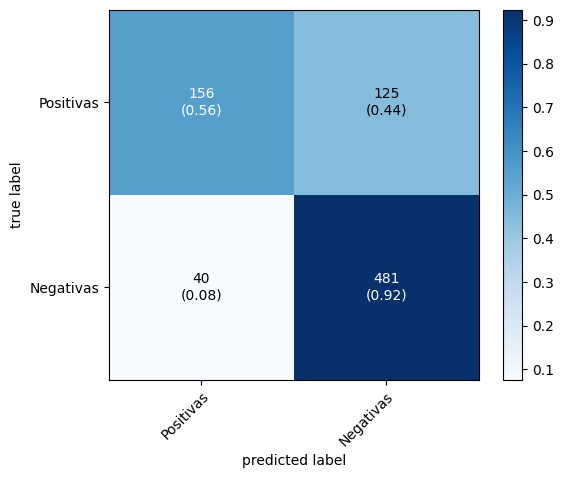

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_predict),
                                colorbar=True,
                                class_names=['Positivas', 'Negativas'],
                                # show_absolute=False,
                                show_normed=True
                                # labels=class_names,
                                # norm_colormap=matplotlib.colors.LogNorm()
                                )
plt.show()